# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [38]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load DataFrame
Load the dataframe from a CSV file or other data source.

In [39]:
# Load DataFrame
df = pd.read_excel('./AmazonSaleReport.xlsx') 
df_timeseries = df[['Date', 'Amount']] 

# Transform date into datetime object
df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'])

df_timeseries.head()  # Display the first few rows of the dataframe

/var/folders/mw/2cx6x93d04g09y_zdvpb9vpc0000gn/T/ipykernel_68435/4064763081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'])


,Date,Amount
0,2022-04-30,647.62
1,2022-04-30,406.00
2,2022-04-30,329.00
3,2022-04-30,753.33
4,2022-04-30,574.00


# Set Date as Index
Set the 'Date' column as the index of the dataframe.

In [40]:
# Set Date as Index
df_timeseries.set_index('Date', inplace=True)
df_timeseries.head()  # Display the first few rows of the dataframe with the new index

,Amount
Date,
2022-04-30,647.62
2022-04-30,406.00
2022-04-30,329.00
2022-04-30,753.33
2022-04-30,574.00


In [41]:
#Print the first and last dates
#df.set_index('Date', inplace=True)
df.sort_index(inplace=True) 
print(df.index.min())
print(df.index.max())
print(df_timeseries.index.min())
print(df_timeseries.index.max())

0
128974
2022-03-31 00:00:00
2022-06-29 00:00:00


# Resample DataFrame
Resample the dataframe to sum the 'Amount' column by a specified frequency (e.g., daily, monthly).

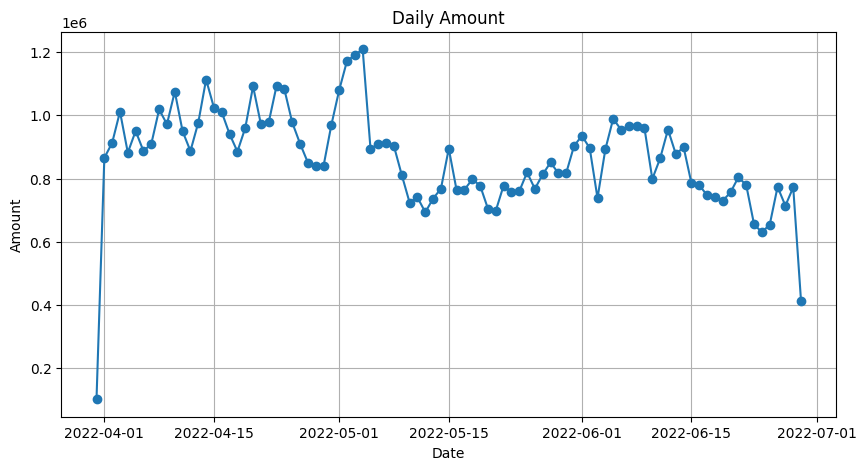

In [42]:
# Resample DataFrame
df_resampled = df_timeseries.resample('D').sum()  # Resample by day and sum the 'Amount' column
df_resampled.head()  # Display the first few rows of the resampled dataframe

# Plot the resampled data
plt.figure(figsize=(10, 5))
plt.plot(df_resampled.index, df_resampled['Amount'], marker='o')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [43]:
# exclude the first and last date
df_resampled = df_resampled[1:-1]
df_resampled.head()  # Display the first few rows of the resampled dataframe

,Amount
Date,
2022-04-01,865478.60
2022-04-02,913101.53
2022-04-03,1011763.38
2022-04-04,882059.17
2022-04-05,950544.05


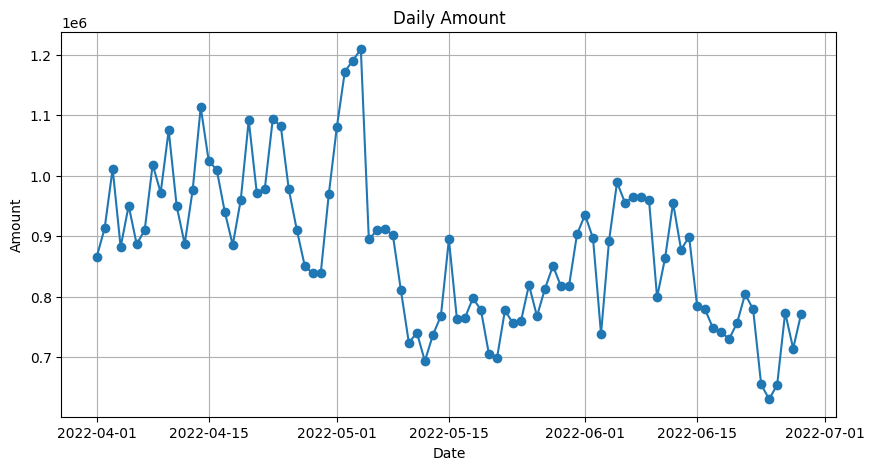

In [44]:
# Plot the resampled data
plt.figure(figsize=(10, 5))
plt.plot(df_resampled.index, df_resampled['Amount'], marker='o')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

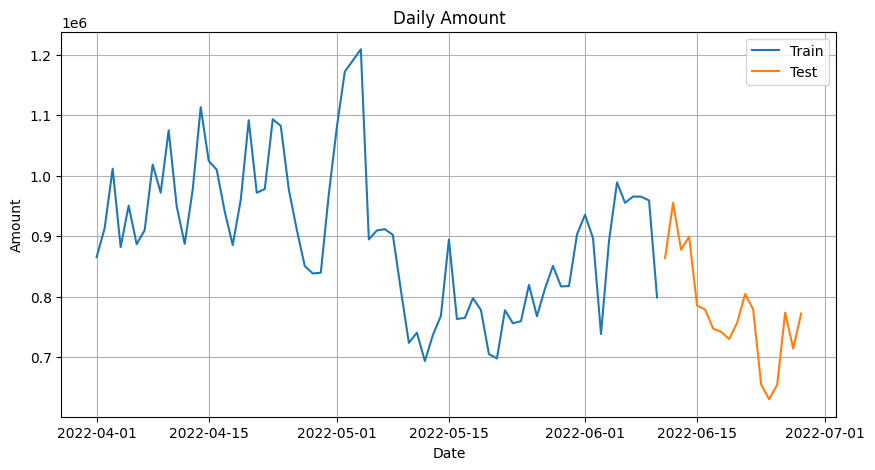

In [57]:
# Split the data into training and testing sets
# 80% for training, 20% for testing
# We do not shuffle the data because the order is important in time series
train_size = int(len(df_resampled) * 0.8)  # 80% for training, 20% for testing
train, test = df_resampled.iloc[:train_size], df_resampled.iloc[train_size:]

# Plot the train vs the test data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Amount'], label='Train')
plt.plot(test.index, test['Amount'], label='Test')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(df_resampled)
#No integration required, d=0

(0.16293091306904395, True)

In [74]:
# adf plot
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_resampled['Amount'])
# Print ADF test results with arguments
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Print the arguments used in the ADF test
print('\nArguments used in ADF test:')
print('Max lags: %d' % result[2])
print('Number of observations used for the ADF regression and calculation of the critical values: %d' % result[3])
print("The data is clearly stationary as the p-value is less than 0.05")

ADF Statistic: -3.096870
p-value: 0.026786
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585

Arguments used in ADF test:
Max lags: 0
Number of observations used for the ADF regression and calculation of the critical values: 88
The data is clearly stationary as the p-value is less than 0.05


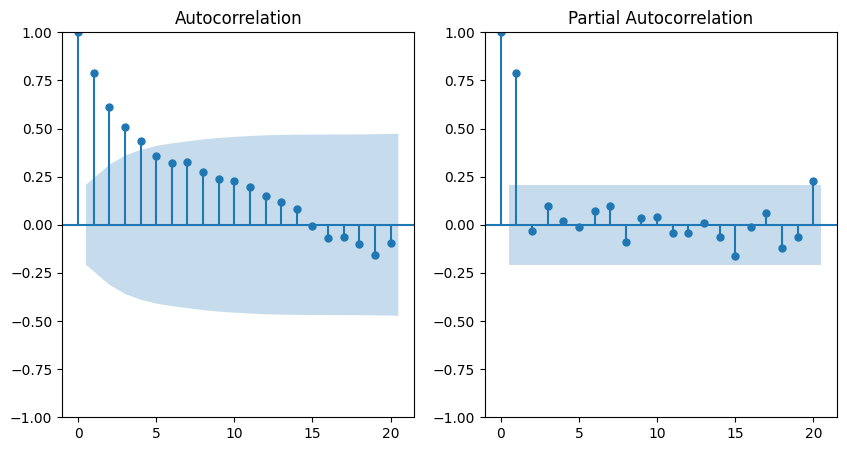

In [ ]:
# Plot the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_acf(df_resampled['Amount'], ax=ax[0])
plot_pacf(df_resampled['Amount'], ax=ax[1])
plt.show()

In [105]:
from pmdarima import auto_arima

arima_model = auto_arima(
    train, 
    start_p=1, 
    d=None,
    start_q=1,
    max_p=100,
    max_d=100,
    max_q=100,
    start_P=1,
    D=0,
    start_Q=1,
    max_P=100,
    max_D=100,
    max_Q=100,
    seasonal=False,
    suppress_warnings=True,
    error_action="warn",
    trace=True,
    n_fits=50,
    maxiter=1000000, 
    stepwise=False
)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1791.889, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1793.890, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1795.964, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1795.736, Time=0.02 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1796.198, Time=0.06 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1795.314, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1793.885, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1795.770, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1797.547, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1795.133, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1796.617, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1795.963, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1797.368, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1799.619, Time=0.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1794.678, Time=0.07 sec
 ARIMA(3,1

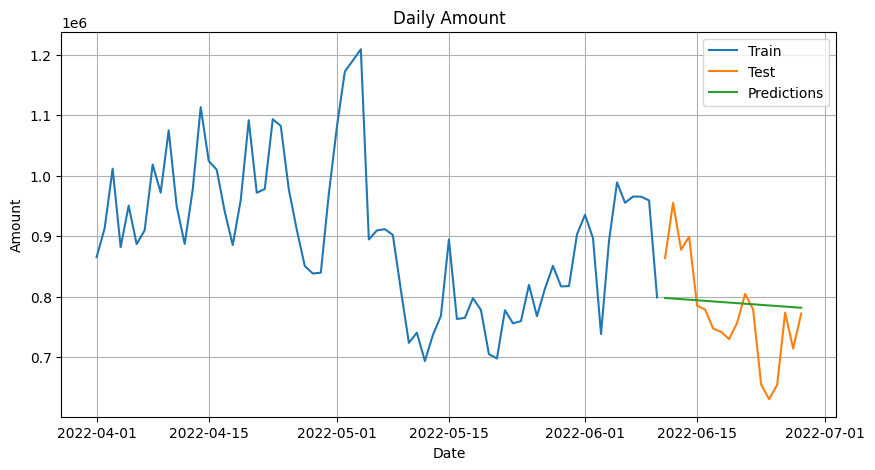

In [106]:
#test the arima model with the test data
predictions_Arima = arima_model.predict(n_periods=len(test))

# Plot the predictions vs the test data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Amount'], label='Train')
plt.plot(test.index, test['Amount'], label='Test')
plt.plot(test.index, predictions_Arima, label='Predictions')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:


# Fit an auto ARIMA model
model = auto_arima(
    train
)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -893.952
Date:                Tue, 11 Feb 2025   AIC                           1789.905
Time:                        21:18:30   BIC                           1792.153
Sample:                    04-01-2022   HQIC                          1790.798
                         - 06-10-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.143e+09   9.41e+08      7.590      0.000     5.3e+09    8.99e+09
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 8.82
Prob(Q):                              0.56   Pr

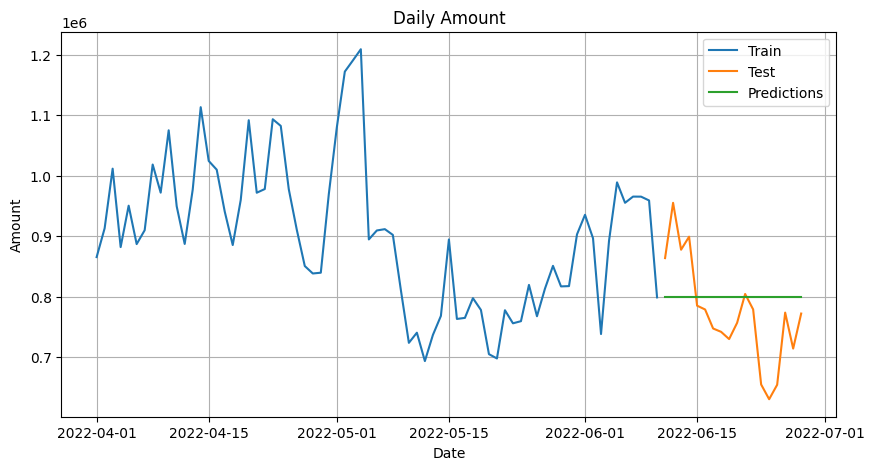

In [92]:
#test the arima model with the test data
predictions = model.predict(n_periods=len(test))

# Plot the predictions vs the test data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Amount'], label='Train')
plt.plot(test.index, test['Amount'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()


Mean Squared Error (MSE): 7610443421.14785
Mean Absolute Error (MAE): 70727.16111111107
R-squared (R2): -0.09396554242954691
AIC: 1789.9047768534397
BIC: 1792.153272095489


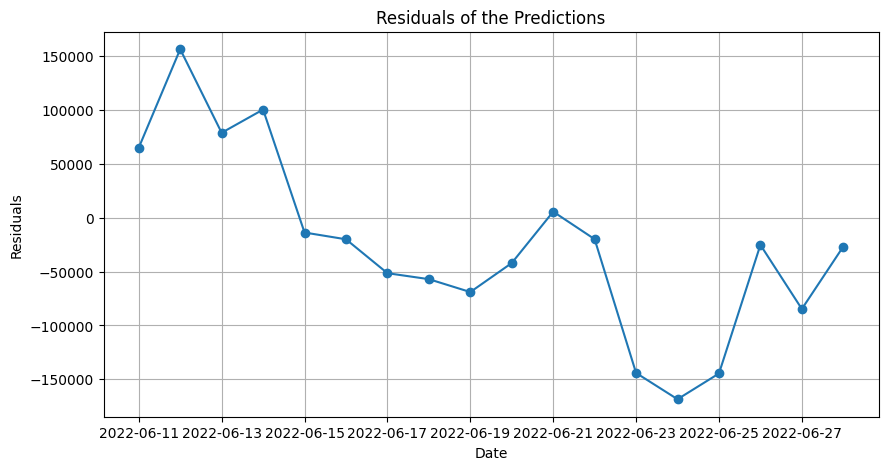

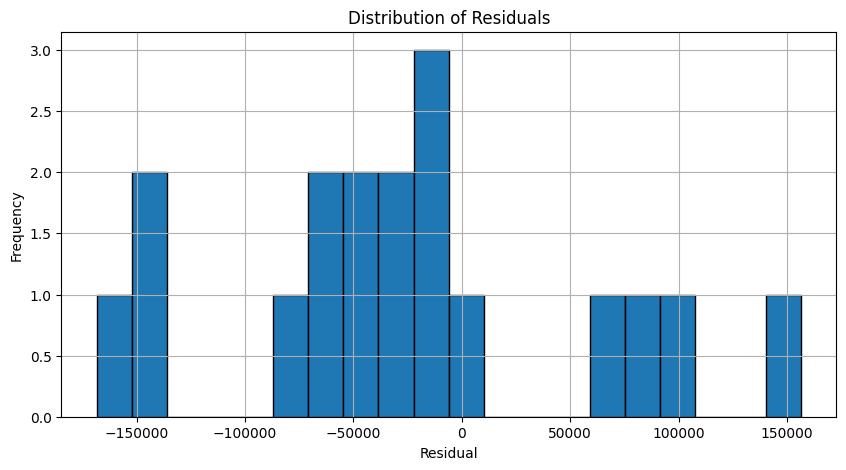

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
# Calculate evaluation metrics
mse = mean_squared_error(test['Amount'], predictions)
mae = mean_absolute_error(test['Amount'], predictions)
r2 = r2_score(test['Amount'], predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


# AIC and BIC
print('AIC:', model.aic())
print('BIC:', model.bic())

# Plot the residuals
residuals = test['Amount'] - predictions
plt.figure(figsize=(10, 5))
plt.plot(test.index, residuals, marker='o')
plt.title('Residuals of the Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot the distribution of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [107]:
# Assumming  seasonality
model_Season = auto_arima(
    train, 
    error_action='ignore', 
    suppress_warnings=True, 
    maxiter=1000,
    seasonal=True,
    n_jobs=-1,  # Parallelization
    m=7,  # Frequency of series
    stepwise=True
)

print(model.summary())

/Users/santi/.pyenv/versions/3.8.10/envs/.venv38/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -893.952
Date:                Tue, 11 Feb 2025   AIC                           1789.905
Time:                        21:45:51   BIC                           1792.153
Sample:                    04-01-2022   HQIC                          1790.798
                         - 06-10-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.143e+09   9.41e+08      7.590      0.000     5.3e+09    8.99e+09
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 8.82
Prob(Q):                              0.56   Pr

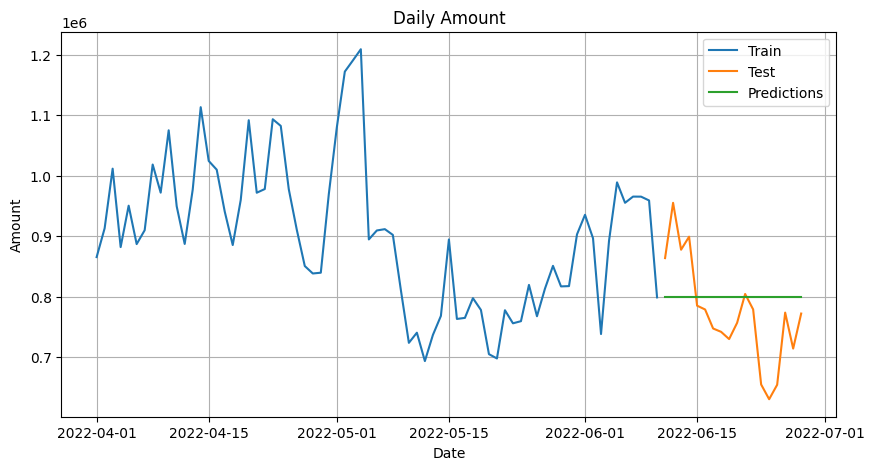

In [108]:
#test the arima model with the test data
predictions_Season = model_Season.predict(n_periods=len(test))

# Plot the predictions vs the test data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Amount'], label='Train')
plt.plot(test.index, test['Amount'], label='Test')
plt.plot(test.index, predictions_Season, label='Predictions')
plt.title('Daily Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()